In [1]:
# Učitavanje potrebnih biblioteka
import pandas as pd

import numpy as np
import seaborn as sb 
%matplotlib notebook
import matplotlib.pyplot as plt
%matplotlib inline 

from sklearn.model_selection import train_test_split

In [ ]:
dionice = pd.read_csv('TSLA.csv') 
dionice.head()

In [3]:
 dionice.shape

(2416, 7)

In [4]:
dionice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2416 non-null   object 
 1   Open       2416 non-null   float64
 2   High       2416 non-null   float64
 3   Low        2416 non-null   float64
 4   Close      2416 non-null   float64
 5   Adj Close  2416 non-null   float64
 6   Volume     2416 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 132.2+ KB


In [5]:
dionice = dionice.drop(['Adj Close'], axis=1)
dionice.head()

,Date,Open,High,Low,Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,6866900


In [6]:
splitted = dionice['Date'].str.split('-', expand=True) 

dionice['day'] = splitted[2].astype('int') 
dionice['month'] = splitted[1].astype('int') 
dionice['year'] = splitted[0].astype('int') 

dionice.head()

,Date,Open,High,Low,Close,Volume,day,month,year
0,2010-06-29,19.000000,25.00,17.540001,23.889999,18766300,29,6,2010
1,2010-06-30,25.790001,30.42,23.299999,23.830000,17187100,30,6,2010
2,2010-07-01,25.000000,25.92,20.270000,21.959999,8218800,1,7,2010
3,2010-07-02,23.000000,23.10,18.709999,19.200001,5139800,2,7,2010
4,2010-07-06,20.000000,20.00,15.830000,16.110001,6866900,6,7,2010


In [7]:
dionice['kraj_kvartala'] = np.where(dionice['month']%3==0,1,0) 
dionice.head()

,Date,Open,High,Low,Close,Volume,day,month,year,kraj_kvartala
0,2010-06-29,19.000000,25.00,17.540001,23.889999,18766300,29,6,2010,1
1,2010-06-30,25.790001,30.42,23.299999,23.830000,17187100,30,6,2010,1
2,2010-07-01,25.000000,25.92,20.270000,21.959999,8218800,1,7,2010,0
3,2010-07-02,23.000000,23.10,18.709999,19.200001,5139800,2,7,2010,0
4,2010-07-06,20.000000,20.00,15.830000,16.110001,6866900,6,7,2010,0


In [8]:
# Izračun postotne promjene
dionice['%PromjenaClose'] = dionice['Close'].pct_change() * 100

dionice['%PromjenaVolume'] = dionice['Volume'].pct_change() * 100


dionice.head()

,Date,Open,High,Low,Close,Volume,day,month,year,kraj_kvartala,%PromjenaClose,%PromjenaVolume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,18766300,29,6,2010,1,NaN,NaN
1,2010-06-30,25.790001,30.42,23.299999,23.830000,17187100,30,6,2010,1,-0.251147,-8.415084
2,2010-07-01,25.000000,25.92,20.270000,21.959999,8218800,1,7,2010,0,-7.847256,-52.180414
3,2010-07-02,23.000000,23.10,18.709999,19.200001,5139800,2,7,2010,0,-12.568297,-37.462890
4,2010-07-06,20.000000,20.00,15.830000,16.110001,6866900,6,7,2010,0,-16.093749,33.602475


In [9]:
# Izračun prosječnog prometa trgovanja u posljednjih 14 dana na temelju stupca Volume
dionice['14D_Mean_Volume'] = dionice['Volume'].rolling(window=14).mean()

# Izračun prosječne završne cijene u posljednjih 14 dana na temelju stupca Close
dionice['14D_Mean_Close'] = dionice['Close'].rolling(window=14).mean()


dionice.head()

,Date,Open,High,Low,Close,Volume,day,month,year,kraj_kvartala,%PromjenaClose,%PromjenaVolume,14D_Mean_Volume,14D_Mean_Close
0,2010-06-29,19.000000,25.00,17.540001,23.889999,18766300,29,6,2010,1,NaN,NaN,NaN,NaN
1,2010-06-30,25.790001,30.42,23.299999,23.830000,17187100,30,6,2010,1,-0.251147,-8.415084,NaN,NaN
2,2010-07-01,25.000000,25.92,20.270000,21.959999,8218800,1,7,2010,0,-7.847256,-52.180414,NaN,NaN
3,2010-07-02,23.000000,23.10,18.709999,19.200001,5139800,2,7,2010,0,-12.568297,-37.462890,NaN,NaN
4,2010-07-06,20.000000,20.00,15.830000,16.110001,6866900,6,7,2010,0,-16.093749,33.602475,NaN,NaN


In [10]:
dionice['Close-Open'] = dionice['Close'] - dionice['Open'] 
dionice['High-Low'] = dionice['High'] - dionice['Low'] 

def Target_var():
    dionice['Kupiti'] = 0

    uvjet1 = dionice['Close'] > dionice['14D_Mean_Close'] * 1.1  
    uvjet2 = dionice['Volume'] > dionice['14D_Mean_Volume'] * 1.1 
    medijan = dionice['High-Low'].rolling(window=30).median()  
    uvjet3 = dionice['High-Low'] * 0.9 > medijan 
    uvjet4 = dionice['Close-Open'] * 0.9 > 0  

    suma = uvjet1.astype(int) + uvjet2.astype(int) + uvjet3.astype(int) + uvjet4.astype(int)
    dionice.loc[suma >= 2, 'Kupiti'] = 1

Target_var()

dionice.head()

,Date,Open,High,Low,Close,Volume,day,month,year,kraj_kvartala,%PromjenaClose,%PromjenaVolume,14D_Mean_Volume,14D_Mean_Close,Close-Open,High-Low,Kupiti
0,2010-06-29,19.000000,25.00,17.540001,23.889999,18766300,29,6,2010,1,NaN,NaN,NaN,NaN,4.889999,7.459999,0
1,2010-06-30,25.790001,30.42,23.299999,23.830000,17187100,30,6,2010,1,-0.251147,-8.415084,NaN,NaN,-1.960001,7.120001,0
2,2010-07-01,25.000000,25.92,20.270000,21.959999,8218800,1,7,2010,0,-7.847256,-52.180414,NaN,NaN,-3.040001,5.650000,0
3,2010-07-02,23.000000,23.10,18.709999,19.200001,5139800,2,7,2010,0,-12.568297,-37.462890,NaN,NaN,-3.799999,4.390001,0
4,2010-07-06,20.000000,20.00,15.830000,16.110001,6866900,6,7,2010,0,-16.093749,33.602475,NaN,NaN,-3.889999,4.170000,0


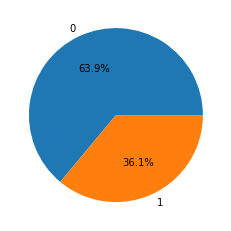

In [11]:
plt.pie(dionice['Kupiti'].value_counts().values, 
 labels=[0, 1], autopct='%1.1f%%') 
plt.show()

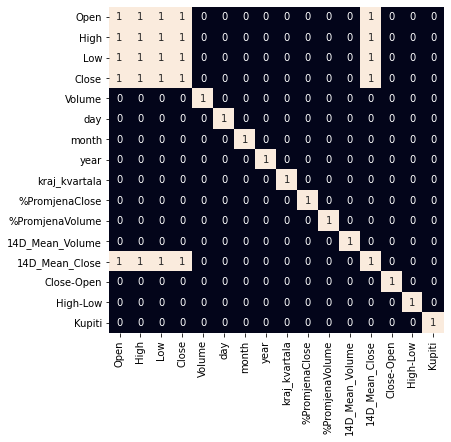

In [12]:
plt.figure(figsize=(6, 6)) 
sb.heatmap(dionice.corr() > 0.9, annot=True, cbar=False) 
plt.show()

In [13]:
dionice = dionice.drop(['Date'], axis=1)
dionice = dionice.drop(['day'], axis=1)
dionice = dionice.drop(['month'], axis=1)
dionice = dionice.drop(['year'], axis=1)
dionice = dionice.drop(['14D_Mean_Close'], axis=1)
dionice = dionice.drop(['Low'], axis=1)
dionice = dionice.drop(['Close'], axis=1)
dionice = dionice.drop(['High'], axis=1)

dionice = dionice.iloc[14:].reset_index(drop=True)

dionice.head()

,Open,Volume,kraj_kvartala,%PromjenaClose,%PromjenaVolume,14D_Mean_Volume,Close-Open,High-Low,Kupiti
0,21.850000,1825300,0,-7.348247,-26.591595,5.417643e+06,-1.550001,1.800001,0
1,20.660000,1252500,0,-0.394089,-31.381143,4.279457e+06,-0.440001,1.400000,0
2,20.500000,957800,0,3.857572,-23.528942,3.760814e+06,0.500000,0.879999,1
3,21.190001,653600,0,1.380957,-31.760284,3.440371e+06,0.100000,0.500000,1
4,21.500000,922200,0,-1.596994,41.095471,3.015750e+06,-0.549999,1.200001,0


In [14]:
y1 = dionice.iloc[:,-1]
y1.shape

(2402,)

In [15]:
X1 = dionice.iloc[:,:-1]
X1.shape

(2402, 8)

In [16]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, random_state = 0)

In [17]:
X_train1.shape

(1801, 8)

In [18]:
X_test1.shape

(601, 8)

In [19]:
y_train1.shape

(1801,)

In [20]:
y_test1.shape

(601,)

In [21]:
dionice.head()

,Open,Volume,kraj_kvartala,%PromjenaClose,%PromjenaVolume,14D_Mean_Volume,Close-Open,High-Low,Kupiti
0,21.850000,1825300,0,-7.348247,-26.591595,5.417643e+06,-1.550001,1.800001,0
1,20.660000,1252500,0,-0.394089,-31.381143,4.279457e+06,-0.440001,1.400000,0
2,20.500000,957800,0,3.857572,-23.528942,3.760814e+06,0.500000,0.879999,1
3,21.190001,653600,0,1.380957,-31.760284,3.440371e+06,0.100000,0.500000,1
4,21.500000,922200,0,-1.596994,41.095471,3.015750e+06,-0.549999,1.200001,0


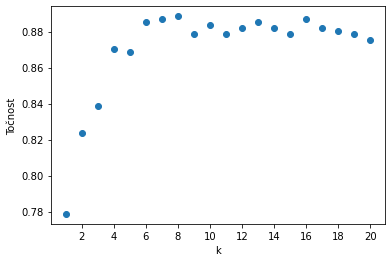

In [22]:
from sklearn.neighbors import KNeighborsClassifier

k_range = range(1,21)
scores = []

for k in k_range:
    knn_class = KNeighborsClassifier(n_neighbors = k)
    knn_class.fit(X_train1, y_train1)
    scores.append(knn_class.score(X_test1, y_test1))

plt.figure()
plt.xlabel('k')
plt.ylabel('Točnost')
plt.scatter(k_range, scores)
plt.xticks([2,4,6,8,10,12,14,16,18,20]);

In [23]:
knn_class = KNeighborsClassifier(n_neighbors = 8)

knn_class.fit(X_train1, y_train1)

print(knn_class.predict(X_test1))

print('Točnost na skupu za testiranje: {:.3f}'.format(knn_class.score(X_test1, y_test1)))



[0 0 0 0 1 1 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 1 0 0 0 1 1 1 0 1 0 0 0 1 0 1 0
 0 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 1 1 1 0 0 1 1 0 1 1 0 0 0 0 0 0
 0 1 1 0 1 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 1 1 1 1 0 0
 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1
 1 0 0 0 0 0 1 0 1 0 1 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0
 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 0 0 0 0 1
 0 1 0 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 1 1 0 0 1 1 1 0 0 0 1 0 0 0
 0 0 1 0 0 1 0 1 1 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 1 0 0 0
 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 1 0 1 1 0 1 0 0 0 0 0 0 0 0 0 1 1 1
 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 1 0
 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0
 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 1 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 1 0 0 0 0 0 0 

In [24]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()

log_reg.fit(X_train1, y_train1)

print(log_reg.predict(X_test1))

print('Točnost: {:.3f}'.format(log_reg.score(X_test1, y_test1)))

[0 1 0 0 1 1 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 1 0 1 0
 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 1 0 0 1 1 0 1 1 0 0 0 0 0 0
 0 1 1 0 1 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 1 1 1 1 0 0
 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 0 0 0 1 0 0 1
 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0
 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 0 0 0 0 1
 0 1 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 1 1 0 0 1 1 1 0 0 0 1 0 0 1
 0 0 1 0 0 1 0 1 1 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 1 0 0 1
 0 0 1 0 0 1 1 0 0 0 1 0 1 0 0 0 0 0 1 1 0 1 1 0 1 0 0 0 0 0 0 0 0 0 1 0 1
 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 1 0
 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0
 1 0 1 0 1 1 0 0 0 0 1 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0
 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 1 0 1 0 0 1 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 1 0 0 0 0 0 0 

In [25]:
print(log_reg.coef_)
print(log_reg.intercept_)

[[-1.04903633e-10  8.05450602e-07 -5.10556278e-13  3.52043712e-12
   5.65107254e-11 -8.52632004e-07  7.58418926e-12  2.90556127e-12]]
[-8.83628503e-13]


In [26]:
from sklearn.neural_network import MLPClassifier

nn_class = MLPClassifier(hidden_layer_sizes = [100,100,100,100,100,100,100], random_state = 0, solver='lbfgs')

nn_class.fit(X_train1, y_train1)

print(nn_class.predict(X_test1))

print('Točnost na skupu za testiranje: {:.2f}'.format(nn_class.score(X_test1, y_test1)))

print(X_train1.shape, X_test1.shape)

[0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 1 1 1 0 0
 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1
 0 1 0 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 1 0 0 0
 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [27]:
matrica_konfuzije1 = pd.crosstab(knn_class.predict(X_test1), y_test1.values)
print(matrica_konfuzije1)

matrica_konfuzije2 = pd.crosstab(log_reg.predict(X_test1), y_test1.values)
print(matrica_konfuzije2)

matrica_konfuzije3 = pd.crosstab(nn_class.predict(X_test1), y_test1.values)
print(matrica_konfuzije3)

col_0    0    1
row_0          
0      374   42
1       25  160
col_0    0    1
row_0          
0      371   39
1       28  163
col_0    0    1
row_0          
0      394  116
1        5   86


In [28]:

TP_knn = matrica_konfuzije1.loc[1, 1]  
FN_knn = matrica_konfuzije1.loc[0, 1]  
recall_knn = TP_knn / (TP_knn + FN_knn) if (TP_knn + FN_knn) != 0 else 0
print('Stopa odaziva za KNN: {:.2f}'.format(recall_knn))


TP_logreg = matrica_konfuzije2.loc[1, 1]  
FN_logreg = matrica_konfuzije2.loc[0, 1]  
recall_logreg = TP_logreg / (TP_logreg + FN_logreg) if (TP_logreg + FN_logreg) != 0 else 0
print('Stopa odaziva za Logističku Regresiju: {:.2f}'.format(recall_logreg))


TP_nn = matrica_konfuzije3.loc[1, 1] if 1 in matrica_konfuzije3.index else 0  
FN_nn = matrica_konfuzije3.loc[0, 1] if 1 in matrica_konfuzije3.columns else 0  
recall_nn = TP_nn / (TP_nn + FN_nn) if (TP_nn + FN_nn) != 0 else 0
print('Stopa odaziva za Neuronsku mrežu: {:.2f}'.format(recall_nn))

print('-'*50)


TP_knn = matrica_konfuzije1.loc[1, 1] 
FP_knn = matrica_konfuzije1.loc[1, 0]  
precision_knn = TP_knn / (TP_knn + FP_knn) if (TP_knn + FP_knn) != 0 else 0
print('Točnost za KNN: {:.2f}'.format(precision_knn))


TP_logreg = matrica_konfuzije2.loc[1, 1]  
FP_logreg = matrica_konfuzije2.loc[1, 0]  
precision_logreg = TP_logreg / (TP_logreg + FP_logreg) if (TP_logreg + FP_logreg) != 0 else 0
print('Točnost za Logističku Regresiju: {:.2f}'.format(precision_logreg))


TP_nn = matrica_konfuzije3.loc[1, 1] if 1 in matrica_konfuzije3.index else 0  
FP_nn = matrica_konfuzije3.loc[1, 0] if 1 in matrica_konfuzije3.index else 0  
precision_nn = TP_nn / (TP_nn + FP_nn) if (TP_nn + FP_nn) != 0 else 0
print('Točnost za Neuronsku mrežu: {:.2f}'.format(precision_nn))


Stopa odaziva za KNN: 0.79
Stopa odaziva za Logističku Regresiju: 0.81
Stopa odaziva za Neuronsku mrežu: 0.43
--------------------------------------------------
Točnost za KNN: 0.86
Točnost za Logističku Regresiju: 0.85
Točnost za Neuronsku mrežu: 0.95
